# EDA on survey data


1. [Mapping strings to a numeric scale](#section1)
2. [Heatmaps](#section2)
3. [One-hot encoding](#section3)
4. [Splitting data fields](#section4)
5. [Melting into long format](#section5)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Some data comes from surveys. This is an example of a survey on fitness

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/fitness.csv'
fit_df = pd.read_csv(url)
fit_df.head(2)

,index,Date,Gender,Age,ImportanceExercise,FitnessLevel,Frequency,Barriers,Activity,DoYouDo,Daytime,Unit,Diet,BarriersDiet,SelfRatingDiet,RecommendedFriend,PurchasedEquipment,Motivation
0,0,2019/07/03 11:48:07 PM GMT+5:30,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,1,2019/07/03 11:51:22 PM GMT+5:30,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


In [3]:
fit_df.shape

(545, 18)

# 1. Where do we begin?  
**What questions can we ask here? What will be an interesting observation?**  
Sometimes, no questions come to mind. So we will begin with heatmaps, to try and find a thread

To do this and begin the exploration, we need to turn some of the data to numeric

## 1a. Mapping strings to numbers

### <span style="color:blue"> Exercise:</span>
> Find the different possible values for `FitnessLevel`, `Diet`, `Daytime` and `DoYouDo`
> 
> Which of these can we map to numbers?


We will map the FitnessLevel and diet strings to numbers (why these fields?):

In [4]:
fitness_mapping = {
    'Unfit': 1,
    'Average': 2,
    'Good': 3,
    'Very good': 4,
    'Perfect': 5
}
fit_df['FitnessLevel_numeric'] = fit_df['FitnessLevel'].map(fitness_mapping)

In [5]:
diet_mapping = {
    'No': 1,
    'Not always': 2,
    'Yes': 3
}
fit_df['Diet_numeric'] = fit_df['Diet'].map(diet_mapping)

sanity check:

In [6]:
fit_df[['FitnessLevel','FitnessLevel_numeric','Diet', 'Diet_numeric']]

,FitnessLevel,FitnessLevel_numeric,Diet,Diet_numeric
0,Good,3,Not always,2
1,Very good,4,Not always,2
2,Good,3,Not always,2
3,Good,3,Yes,3
4,Unfit,1,Yes,3
...,...,...,...,...
540,Perfect,5,Not always,2
541,Average,2,Yes,3
542,Average,2,Not always,2
543,Good,3,Not always,2


## 1b. One-hot encoding for heatmaps

Heatmaps can be used to map correlations between numeric features. 
They work only on numeric data

In [7]:
features = fit_df.select_dtypes(include=[np.number])
features.columns[1:]

Index(['ImportanceExercise', 'SelfRatingDiet', 'FitnessLevel_numeric',
       'Diet_numeric'],
      dtype='object')

<AxesSubplot: >

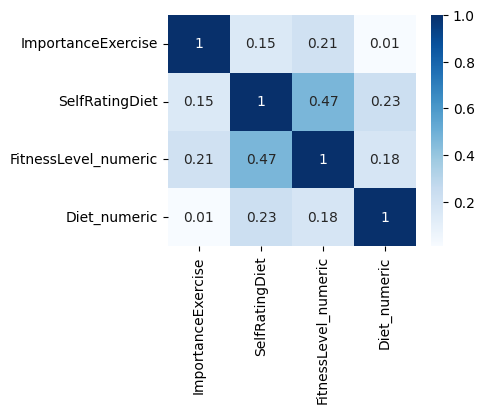

In [8]:
plt.figure(figsize=(4,3))
correlation_matrix = fit_df[features.columns[1:]].corr(method = "kendall").round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

Use one hot encoding to create some more numeric data

In [9]:
features = ['index','ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'DoYouDo', 'Daytime']
small_fit = pd.get_dummies(fit_df[features])
small_fit

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,DoYouDo_I don't really exercise,DoYouDo_With a friend,DoYouDo_With a group,DoYouDo_Within a class environment,Daytime_Afternoon,Daytime_Early morning,Daytime_Evening
0,0,2,3,2,3,0,1,0,0,0,0,1,0
1,1,4,4,2,4,0,0,0,1,0,0,1,0
2,2,3,3,2,4,1,0,0,0,0,0,1,0
3,3,4,3,3,4,1,0,0,0,0,0,0,1
4,4,3,1,3,4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,3,5,2,4,1,0,0,0,0,0,0,1
541,541,1,2,3,3,0,1,0,0,0,0,1,0
542,542,4,2,2,4,1,0,0,0,0,0,1,0
543,543,3,3,2,3,1,0,0,0,0,0,0,1


Now that we have more fields, look for correlations again

<AxesSubplot: >

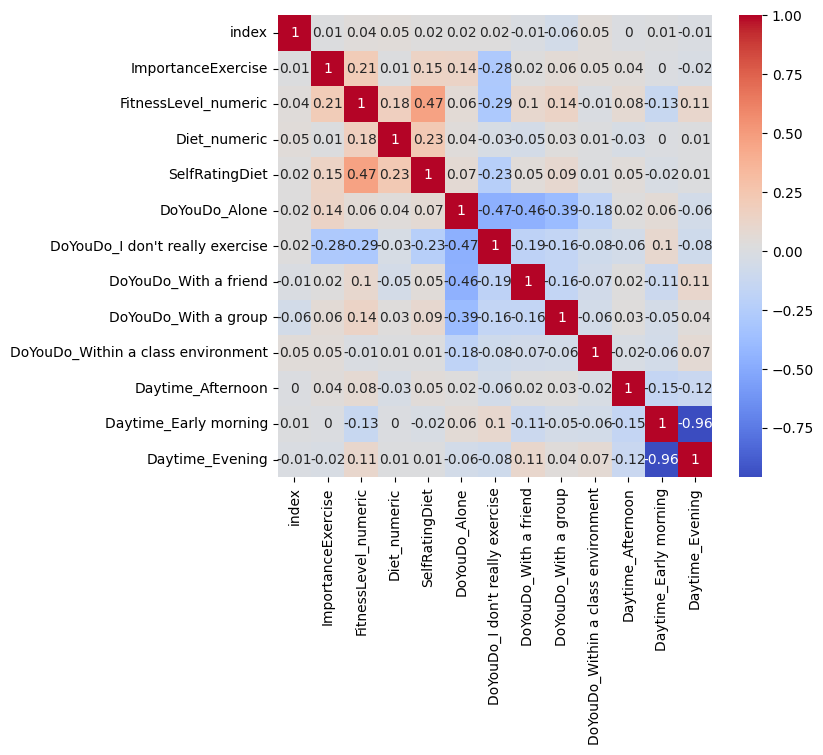

In [10]:
plt.figure(figsize=(7,6))
correlation_matrix = small_fit.corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

This gives us some directions to pursue:
> A correlation between time of day and whether exercise is alone?  
> A group seems to have the highest correlation with a high fitness level?  
> Early morning seems to have a negative correlation with fitness level (?)  
> Correlation between diet and fitness?  

Note: there is some correlation between columns such as: `DoYouDo_Alone` and `DoYouDo_I don't really exercise` because although they can't both be `1` at the same time, they can both be `0` at the same time

# 2. Connections beween the time of day, fitness and exercising alone

Working on time of day + whether exercise is alone:  
create a `not_alone` column, to try dig in this some more

In [11]:
small_fit["not_alone"] = small_fit["DoYouDo_With a friend"] + small_fit["DoYouDo_With a group"] + small_fit["DoYouDo_Within a class environment"]

sanity check: did we get this right?

In [12]:
small_fit[small_fit["not_alone"]>1]

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,DoYouDo_I don't really exercise,DoYouDo_With a friend,DoYouDo_With a group,DoYouDo_Within a class environment,Daytime_Afternoon,Daytime_Early morning,Daytime_Evening,not_alone


with our new `not_alone` column

<AxesSubplot: >

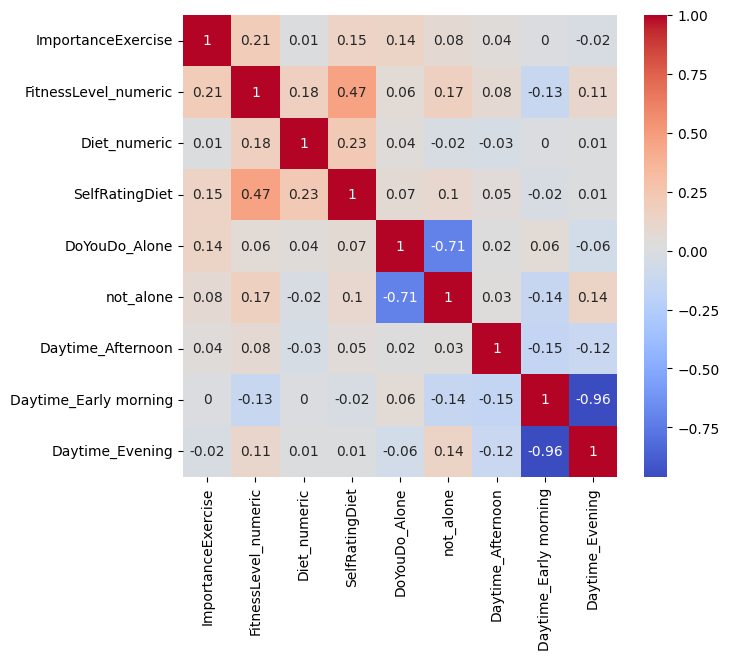

In [13]:
features = ['ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet','DoYouDo_Alone',"not_alone", 'Daytime_Afternoon',
       'Daytime_Early morning', 'Daytime_Evening']
plt.figure(figsize=(7,6))
correlation_matrix = small_fit[features].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

### <span style="color:blue"> Exercise:</span>
> Slice the data so that it doesn't contain Afternoon in `Daytime` and doesn't contain I don't really exercise in `exercise`
> 
> Then re-create the figure


In [14]:
#data_slice = 

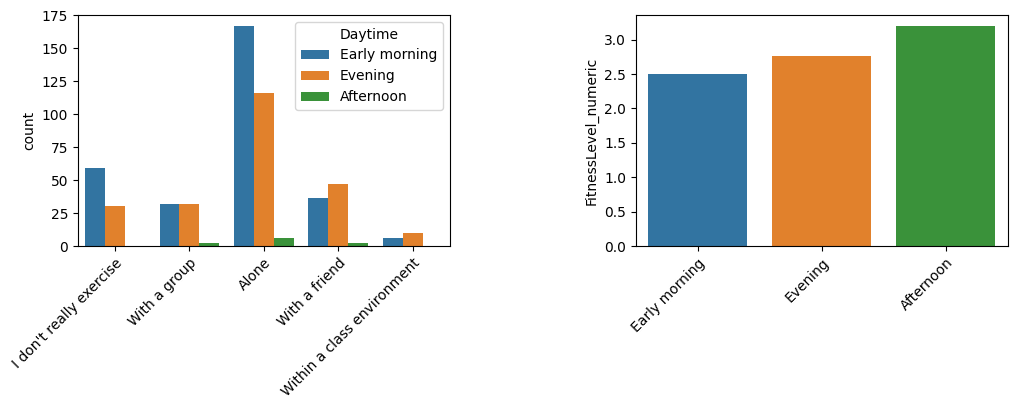

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

sns.countplot(data = fit_df, hue='Daytime',  x = "DoYouDo", ax = ax[0]) 
sns.barplot(data = fit_df , x='Daytime',  y = "FitnessLevel_numeric", errorbar=None, ax = ax[1])  

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.show()


**Note the alignment of the tick marks**  
using horizontal alignment (`ha`). Other values are:  
'left', 'center', and 'justify'

Is there maybe a connection between diets and the time of the day?

Text(0.5, 0, '')

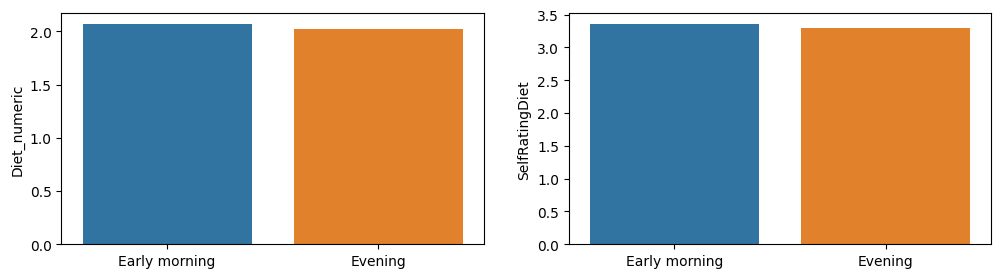

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.barplot(data = fit_df[(fit_df.DoYouDo == "Alone")& (fit_df.Daytime != "Afternoon")] , x='Daytime',  y = "Diet_numeric", errorbar=None, ax = ax[0])  
sns.barplot(data = fit_df[(fit_df.DoYouDo == "Alone")& (fit_df.Daytime != "Afternoon")] , x='Daytime',  y = "SelfRatingDiet", errorbar=None,ax = ax[1])  

ax[0].set_xlabel('')
ax[1].set_xlabel('')

**Input to chatGPT:**  
fix grammar:
Most people who are exercise alone exercise in the morning  
People who exercise in the morning percieve themselves as unfit  than those in evening
No connection to diet

---
### <span style="color:green"> Observation 1:</span>

>Most people who exercise alone do so in the morning.
>
>People who exercise in the morning perceive themselves as more unfit compared to those who exercise in the evening.
>
>There is no connection to diet.
---

# 3. Getting the data ready - to analyze exercise type

We saw some connection to group type. We can work with group type, or dig in on exercies.  
To continue, lets:
1. Merge our current data into the original data - merge `small_fit` into `fit_df`
2. Split the exercise data field
3. Melt data into a long format

## 3a. Merge

In [17]:
merged_df = fit_df.merge(small_fit)

**note: give the merged dataframe a new name, or else everytime you merge your dataframe will change**

In [18]:
len(merged_df)

545

In [19]:
merged_df.columns

Index(['index', 'Date', 'Gender', 'Age', 'ImportanceExercise', 'FitnessLevel',
       'Frequency', 'Barriers', 'Activity', 'DoYouDo', 'Daytime', 'Unit',
       'Diet', 'BarriersDiet', 'SelfRatingDiet', 'RecommendedFriend',
       'PurchasedEquipment', 'Motivation', 'FitnessLevel_numeric',
       'Diet_numeric', 'DoYouDo_Alone', 'DoYouDo_I don't really exercise',
       'DoYouDo_With a friend', 'DoYouDo_With a group',
       'DoYouDo_Within a class environment', 'Daytime_Afternoon',
       'Daytime_Early morning', 'Daytime_Evening', 'not_alone'],
      dtype='object')

## 3b. Splitting data fields

Split the exercise column according to ';'

n indicates how many splits to perform

In [20]:
list_exs = fit_df["Activity"].str.split(";", n = 6, expand = True)
list_exs

,0,1,2,3,4,5,6
0,I don't really exercise,None,None,None,None,None,None
1,Walking or jogging,Swimming,None,None,None,None,None
2,Walking or jogging,None,None,None,None,None,None
3,Walking or jogging,Gym,Lifting weights,None,None,None,None
4,I don't really exercise,None,None,None,None,None,None
...,...,...,...,...,...,...,...
540,Walking or jogging,None,None,None,None,None,None
541,Walking or jogging,Gym,Swimming,None,None,None,None
542,Walking or jogging,Yoga,None,None,None,None,None
543,Walking or jogging,None,None,None,None,None,None


Do we need more splits? 

Also - note that the columns are numbered, like the rows. No column names.

In [21]:
fit_df.Activity.str.count(';').max()

6

In [22]:
list_exs[6].unique()

array([None, 'Team sport'], dtype=object)

Add these new columns with the exercises to the dataframe

In [23]:
merged_df["choice1"]= list_exs[0]
merged_df["choice2"]= list_exs[1]
merged_df["choice3"]= list_exs[2]
merged_df["choice4"]= list_exs[3]

We now want to view some stats on the diffent exercise. But the data is in wide format.

Wide format: each row has one `key`: one person, one occurance

Long format: each row has more than one `key`: one person per date, one occurance per person, one person per date per site

## 3c. Melting into long format

Lets unite exercise1, exercise2 and exercise 3 into one column. 

We use 'melt'. 



This is in wide format:

In [24]:
merged_df.columns

Index(['index', 'Date', 'Gender', 'Age', 'ImportanceExercise', 'FitnessLevel',
       'Frequency', 'Barriers', 'Activity', 'DoYouDo', 'Daytime', 'Unit',
       'Diet', 'BarriersDiet', 'SelfRatingDiet', 'RecommendedFriend',
       'PurchasedEquipment', 'Motivation', 'FitnessLevel_numeric',
       'Diet_numeric', 'DoYouDo_Alone', 'DoYouDo_I don't really exercise',
       'DoYouDo_With a friend', 'DoYouDo_With a group',
       'DoYouDo_Within a class environment', 'Daytime_Afternoon',
       'Daytime_Early morning', 'Daytime_Evening', 'not_alone', 'choice1',
       'choice2', 'choice3', 'choice4'],
      dtype='object')

In [25]:
features = ['index','ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'choice1','choice2', 'choice3', 'choice4', 'DoYouDo_Alone',"not_alone", 'Daytime']

In [26]:
merged_df[features].head(2)

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,choice1,choice2,choice3,choice4,DoYouDo_Alone,not_alone,Daytime
0,0,2,3,2,3,I don't really exercise,None,None,None,0,0,Early morning
1,1,4,4,2,4,Walking or jogging,Swimming,None,None,0,1,Early morning


This is in long format:

In [27]:
ids = ['index','ImportanceExercise', 'FitnessLevel','FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'DoYouDo_Alone',"not_alone", 'Daytime']
values = ['choice1','choice2', 'choice3', 'choice4']

In [28]:
melted_df = pd.melt(merged_df, id_vars= ids, value_vars= values)
melted_df.head()

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,not_alone,Daytime,variable,value
0,0,2,Good,3,2,3,0,0,Early morning,choice1,I don't really exercise
1,1,4,Very good,4,2,4,0,1,Early morning,choice1,Walking or jogging
2,2,3,Good,3,2,4,1,0,Early morning,choice1,Walking or jogging
3,3,4,Good,3,3,4,1,0,Evening,choice1,Walking or jogging
4,4,3,Unfit,1,3,4,0,0,Evening,choice1,I don't really exercise


Rename columns:

In [29]:
melted_df = melted_df.rename(columns={'variable':'choice','value':'exercise'})
melted_df.columns

Index(['index', 'ImportanceExercise', 'FitnessLevel', 'FitnessLevel_numeric',
       'Diet_numeric', 'SelfRatingDiet', 'DoYouDo_Alone', 'not_alone',
       'Daytime', 'choice', 'exercise'],
      dtype='object')

Each id appears a few times (how many times?)

In [30]:
melted_df.loc[melted_df['index']== 4]

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,not_alone,Daytime,choice,exercise
4,4,3,Unfit,1,3,4,0,0,Evening,choice1,I don't really exercise
549,4,3,Unfit,1,3,4,0,0,Evening,choice2,None
1094,4,3,Unfit,1,3,4,0,0,Evening,choice3,None
1639,4,3,Unfit,1,3,4,0,0,Evening,choice4,None


# 4. Exercise type, fitness level and diet

Section 3 was technical  
finally.. we can look at the categories

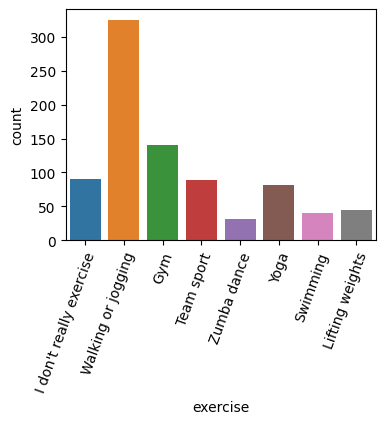

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(data = melted_df, x = 'exercise')
plt.xticks(rotation=70, ha='right', rotation_mode='anchor')
plt.show()

Now lets look at the fitness level:

In [32]:
group_df = melted_df.groupby('exercise')[['FitnessLevel_numeric']].mean()
group_df

,FitnessLevel_numeric
exercise,
Gym,2.864286
I don't really exercise,2.033333
Lifting weights,3.111111
Swimming,2.926829
Team sport,3.056180
Walking or jogging,2.709877
Yoga,2.728395
Zumba dance,2.645161


plot the average fitness level of each exercise.  
It is better to first order them

In [33]:
order_y=melted_df.groupby('exercise')['FitnessLevel_numeric'].mean().sort_values().index

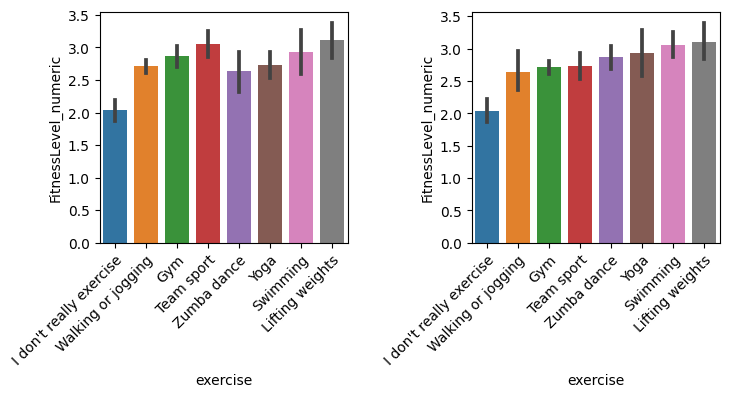

In [34]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
plt.subplots_adjust(wspace = 0.5)
sns.barplot(data = melted_df, x='exercise', y='FitnessLevel_numeric', ax = ax[0])
sns.barplot(data = melted_df, x='exercise', y='FitnessLevel_numeric', order = order_y, ax = ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

order the indexes for the next set of figures:

In [35]:
order_count = melted_df['exercise'].value_counts().index
#order_count

In [36]:
order_y=melted_df.groupby('exercise')['FitnessLevel_numeric'].mean().sort_values().index
#order_y

In [37]:
order_diet=melted_df.groupby('exercise')['SelfRatingDiet'].mean().sort_values().index
#order_diet

In [38]:
order_diet2=melted_df.groupby('exercise')['Diet_numeric'].mean().sort_values().index
#order_diet2

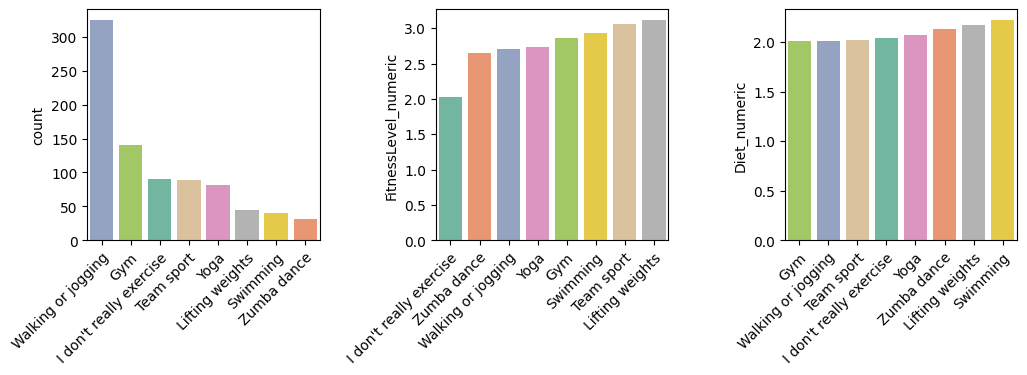

In [39]:
cmap = plt.get_cmap('Set2')
colors = cmap(np.linspace(0, 1, len(order_y)))

color_map = dict(zip(order_y, colors))

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

sns.countplot(data=melted_df, x='exercise', ax=ax[0], order=order_count, palette=color_map)
sns.barplot(data=melted_df, x='exercise', y='FitnessLevel_numeric', ax=ax[1], errorbar=None, palette=color_map, order=order_y)
sns.barplot(data=melted_df, x='exercise', y='Diet_numeric', ax=ax[2], errorbar=None, palette=color_map, order=order_diet2)

# Correctly set x-tick labels for each subplot based on their own order
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')  # Adjusted to use ax[1]'s labels


#plt.set_tick_params(rotation=45, ha='right', rotation_mode='anchor')

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

plt.show()

**Input to ChatGPT**  
fix grammar:  
People who do a less popular exercise seem to declare themselves as more fit
They are also more on a diet.
Zumba dancers don't feel fit and are more on a diet.  

I asked ChatGPT to fix the grammar without changing the style.


---
### <span style="color:green"> Observation 2:</span>

>
>People who engage in less popular exercises tend to consider themselves as being more fit. They are also more likely to follow a diet. 
>
>Zumba dancers don't feel fit and tend to follow a diet more strictly.



---

---

# 5. More fit more diet?

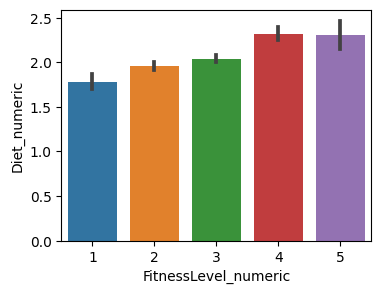

In [40]:
plt.figure(figsize=(4,3))
sns.barplot(data=melted_df, x='FitnessLevel_numeric', y='Diet_numeric')
plt.show()

We can see a certain connection between fitness and diet.

The correlation we found is not high (0.21). Let's try to break it down by exercises.
Order the exercises by the diet level of the most fit  
Color the two that stand out in a different color

In [41]:
melted_df[melted_df.FitnessLevel_numeric ==5].groupby('exercise')['Diet_numeric'].mean().sort_values()

exercise
Gym                        2.000000
Team sport                 2.142857
Walking or jogging         2.294118
Yoga                       2.500000
Swimming                   2.600000
Lifting weights            2.666667
I don't really exercise    3.000000
Zumba dance                3.000000
Name: Diet_numeric, dtype: float64

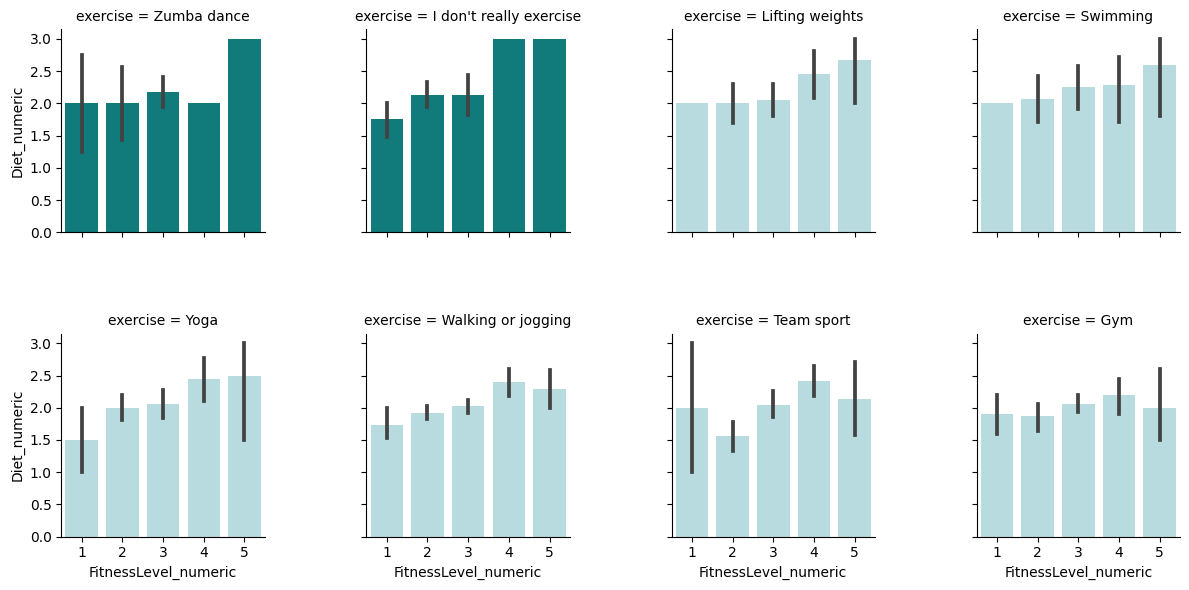

In [42]:
custom_order = ["Zumba dance","I don't really exercise", "Lifting weights", 'Swimming', 'Yoga',
                'Walking or jogging',  'Team sport','Gym' ]
custom_palette = {exercise: 'darkcyan' if exercise in ["Zumba dance", "I don't really exercise"] else 'powderblue' for exercise in custom_order}

g = sns.FacetGrid(data=melted_df, col="exercise", hue="exercise", col_wrap=4, col_order=custom_order, palette=custom_palette)
g.map_dataframe(sns.barplot, x='FitnessLevel_numeric', y="Diet_numeric")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

---
### <span style="color:green"> Observation 3:</span>

>
>We observe that fit individuals, particularly those who engage in Zumba dancing or do not exercise
> are more likely to adhere to a diet.


---

Working with the chat correctly:

# 7. Zoom-in on a specific slice

We can drill down to analyze Zumba dancers. 

In [43]:
zumba_df = melted_df[melted_df.exercise == "Zumba dance"]

<AxesSubplot: >

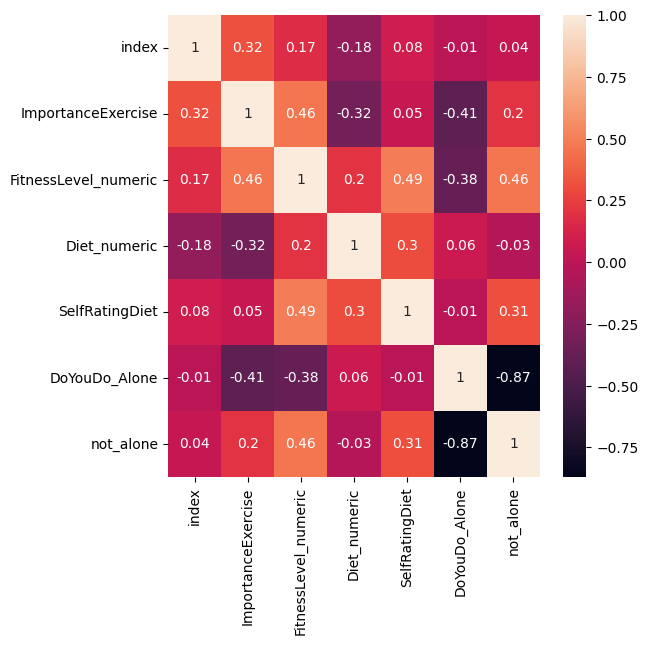

In [44]:
plt.figure(figsize=(6,6))
correlation_matrix = zumba_df.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Is this it? No.. this is only the beginning.

Which exercises are often done together?

Who thinks exercise is important? etc.